<font color='lime'>

# Regression

</font>

<font color='yellow'>

##  Process the initial data

</font> 

<font color='orange'>

### Load necessary libs

</font> 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

<font color='orange'>

###  Load data

</font>

In [17]:
# Load the dataset
file_path = 'data/spotify_songs.csv'
spotify_data = pd.read_csv(file_path)

<font color='orange'>

###  Identifying and removing outliers

</font>

In [18]:
# Removing duplicates
spotify_data.drop_duplicates(inplace=True)

# Removing rows with null values
spotify_data.dropna(inplace=True)

# Identifying and removing outliers
# For simplicity, we use the Z-score to identify and remove outliers
from scipy import stats
spotify_data = spotify_data[(np.abs(stats.zscore(spotify_data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]


<font color='orange'>

###  Splitting && Normalizing

</font>

In [19]:
# Choosing the target feature 'energy'
X = spotify_data.drop(['energy', 'track_id', 'track_name', 'track_artist', 'track_album_id', 
                       'track_album_name', 'track_album_release_date', 'playlist_name', 
                       'playlist_id', 'playlist_genre', 'playlist_subgenre'], axis=1)
y = spotify_data['energy']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color='yellow'>

## Metrics for each model

</font> 

<font color='orange'>

### Metrics for each model

</font> 

In [20]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge()
}

# Training and evaluating each model
results = {}
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    predictions = model.predict(X_test_scaled)

    # Metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results
    results[name] = {
        "model": model,
        "mse": mse,
        "r2": r2,
        "predictions": predictions
    }

    # Output MSE and R2
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}\n")

Linear Regression:
  Mean Squared Error: 0.0113
  R2 Score: 0.5943

Lasso:
  Mean Squared Error: 0.0120
  R2 Score: 0.5674

Ridge:
  Mean Squared Error: 0.0113
  R2 Score: 0.5943



<font color='orange'>

### Metrics for each model

</font> 

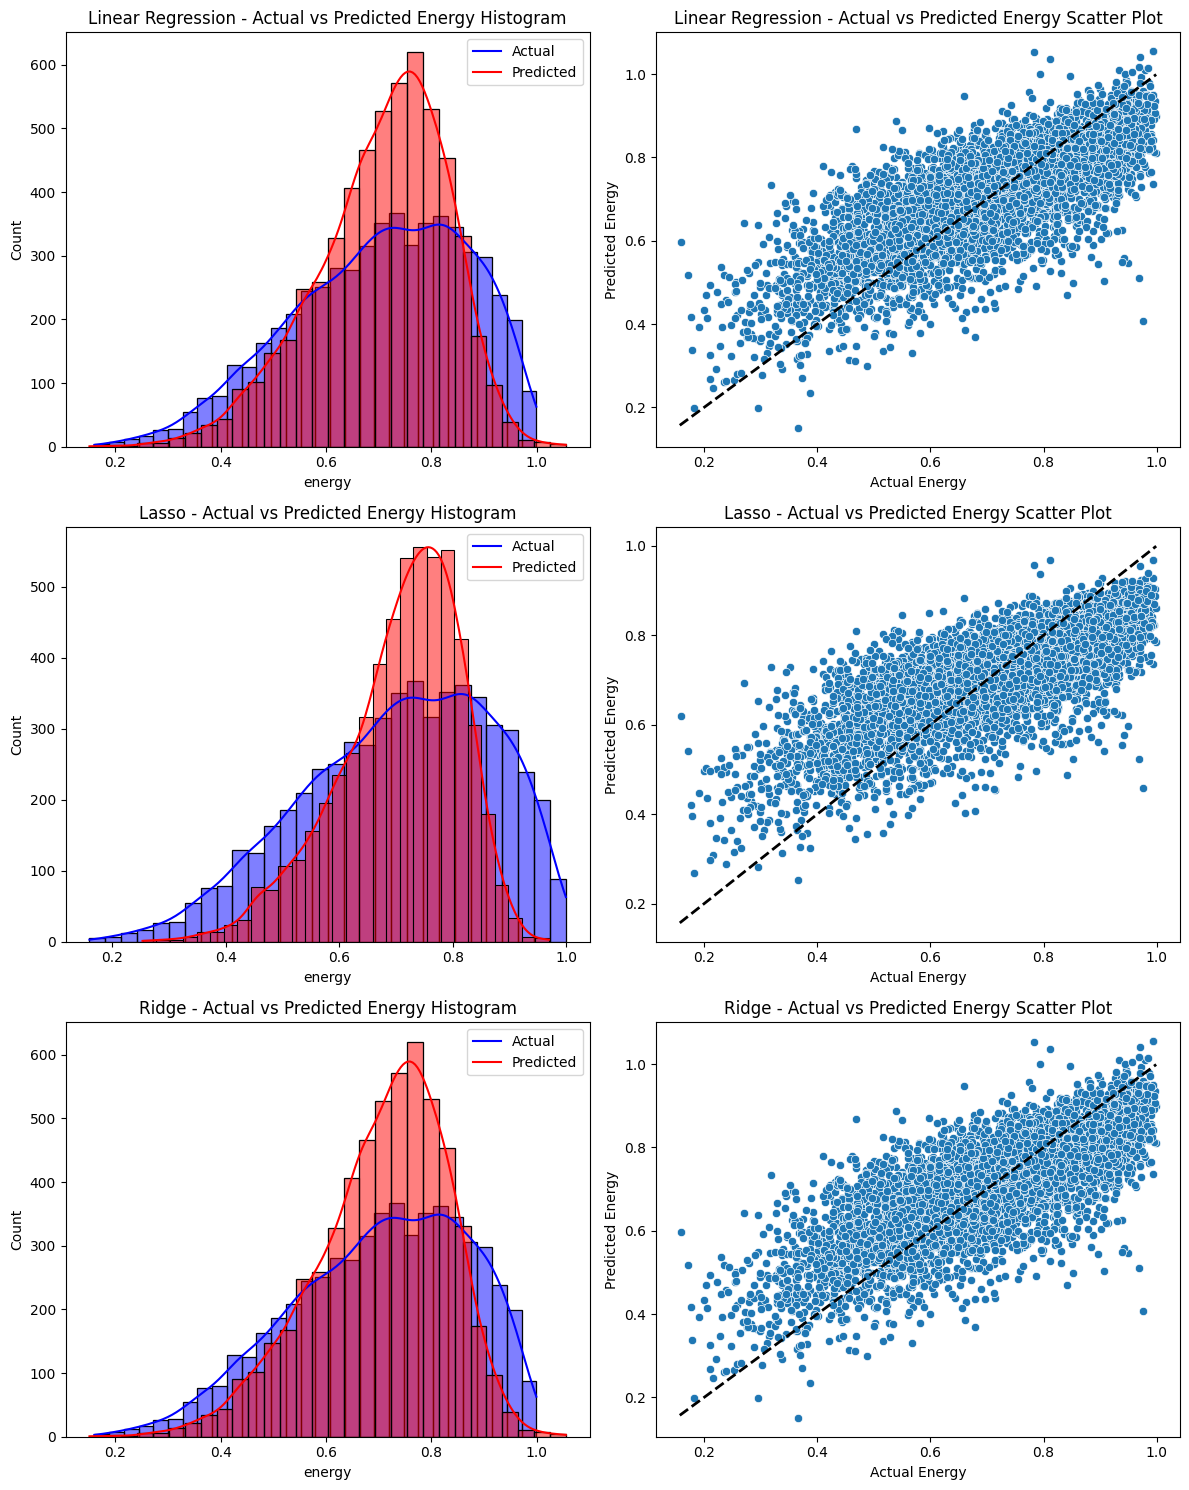

In [21]:
# Plotting histograms and scatter plots
fig, axs = plt.subplots(len(models), 2, figsize=(12, len(models)*5))

for i, (name, result) in enumerate(results.items()):
    # Histograms
    sns.histplot(y_test, bins=30, kde=True, color="blue", ax=axs[i, 0])
    sns.histplot(result['predictions'], bins=30, kde=True, color="red", ax=axs[i, 0])
    axs[i, 0].set_title(f'{name} - Actual vs Predicted Energy Histogram')
    axs[i, 0].legend(['Actual', 'Predicted'])

    # Scatter plots
    sns.scatterplot(x=y_test, y=result['predictions'], ax=axs[i, 1])
    axs[i, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    axs[i, 1].set_title(f'{name} - Actual vs Predicted Energy Scatter Plot')
    axs[i, 1].set_xlabel('Actual Energy')
    axs[i, 1].set_ylabel('Predicted Energy')

plt.tight_layout()
plt.show()